## EE 461P: Data Science Principles  
### Assignment 5 
### Total points: 100 pts
### Due: April 22, 2021 submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline). You can also follow the below steps to embed an image,
* Set cell mode to Markdown
* Drag and drop your image into the cell. The following command will be created:
`![image.png](attachment:image.png)` 
* Execute/Run the cell and the image will be displayed. Once you submit make sure to download the notebook and verify if the image exists.

### Name(s) and EID(s):
1. Simoni Maniar (ssm3256)
2. 

### Homework group No.: 


`NOTE : Fill the Name and EID section along with group number without fail.`

# Question 1 - Decision Tree (5 pts) 
Previous Homework Question Carried Forward

In this question, we will use the same loan dataset from the previous homework, to predict if a customer will subscribe or no (yes/no).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

# Loading the data file
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Input variables:
# bank client data:
1 - `age` (numeric)

2 - `job` : type of job (categorical: 'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3 - `marital` : marital status (categorical: 'divorced','married','single'; note: 'divorced' means divorced or widowed)

4 - `education` (categorical: 'primary', 'secondary','tertiary')

5 - `default`: has credit in default? (categorical: 'no','yes','unknown')

6 - `balance`: account balance

7 - `housing`: has housing loan? (categorical: 'no','yes','unknown')

8 - `loan`: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
9 - `contact`: contact communication type (categorical: 'cellular','telephone')

10 - `day_of_month` : 1,2....31

11 - `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
13 - `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 10000 means client was not previously contacted)

15 - `previous`: number of contacts performed before this campaign and for this client (numeric)

16 - `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')

# Output variable (desired target):
17 - `y` - has the client subscribed a term deposit? (binary: 'yes','no')

**All pre-processing is done where categorical variables are converted to numeric values and unnecessary columns are dropped.**

In [2]:
# Make a copy for parsing
bank_data = bank.copy()

# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

#Convert categorical values to numeric values
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

# Convert categorical variables to dummies
bank_data = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

# Convert p_days to a probability value
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)
# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)
bank_data.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,job_admin.,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,recent_pdays
0,59,2343,1042,1,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
1,56,45,1467,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
2,41,1270,1389,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
3,55,2476,579,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
4,54,184,673,2,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,-1.0


In [3]:
# Splitting the data into training and test data with 80:20 ratio with random_state=50.
# Building the data model
# Train-Test split: 20% test data
X = bank_data.drop('deposit_cat', 1)
Y = bank_data.deposit_cat
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

Same question from previous homework carried forward,

**(5 pts)** Build decision tree with depth = 2 and criterion = Gini. Refer to [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) for more information on how to implement using sklearn. Report the accuracy and AUC for the test data and [plot the ROC curve](https://github.com/justmarkham/scikit-learn-tips/blob/master/notebooks/21_plot_roc_curve.ipynb) using the decision tree.






Accuracy score: 0.727

AUC: 0.734


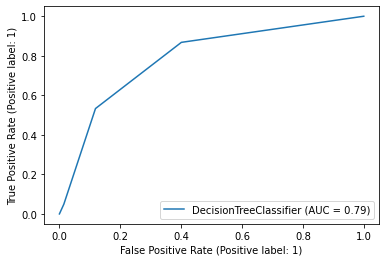

In [4]:
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=2)
Y_pred = dt.fit(X_train, Y_train).predict(X_test)

# Calculate accuracy
print(f"\nAccuracy score: {metrics.accuracy_score(Y_test, Y_pred):.3f}")
fpr, tpr, t = metrics.roc_curve(Y_test, Y_pred)
print(f"\nAUC: {metrics.auc(fpr, tpr):.3f}")
metrics.plot_roc_curve(dt, X_test, Y_test);

# Question 2 - Concepts (15 pts)
Previous Homework Question Carried Forward

**(3+3+4 pts) Part a)**. Briefly describe what you understand by a Lift curve/chart. How is it similar to an ROC curve and in what way is it different? Provide an example where you might prefer using Lift (for a certain decile) over AUROC (AUC) as a point measure of the performance of your classifier. (Point measure means evaluation using a single numeric value).

**(5 pts) Part b)**. Explain what it means to calibrate a classifier. Give an example of an application where having a well calibrated model is important, and it is not enough to just estimate what the most likely class label is for a given data point.

# Question 3 - Multi-Class Classification - 10 pts 

In this problem, we will explore multi-class classification using different machine learning models. We will be predicting the glass type from the 10 features listed below, There are 7 class/category as highlighted, use the given code to load the dataset.

Attribute Information:
   * Id number: 1 to 214
   * RI: refractive index
   * Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
   * Mg: Magnesium
   * Al: Aluminum
   * Si: Silicon
   * K: Potassium
   * Ca: Calcium
   * Ba: Barium
   * Fe: Iron

Class Attribute : Type of glass
  * 1 - building_windows_float_processed
  * 2 - building_windows_non_float_processed
  * 3 - vehicle_windows_float_processed
  * 4 - vehicle_windows_non_float_processed (none in this database)
  * 5 - containers
  * 6 - tableware
  * 7 - headlamps

In [49]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("glass.data",header=None)
y = df.iloc[:,10]
X = df.iloc[:,1:10]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

* **Part a)** Fit a decision tree with default parameters using train data. Refer to [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) for more information on how to implement using sklearn. Report the accuracy and plot the confusion matrix for the test data using the decision tree. Refer [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) for plotting the confusion matrix.**[2.5pts]**

* **Part b)** Create a logistic regression model, with default parameters and max_iter = 10000. Fit the model on train data and report the accuracy and confusion matrix on test data. **[2.5pts]**

* **Part c)** Build a MLPCLassifier with 2 hidden layers and 256 hidden units each, and default values for the rest of the parameters. Fit the model on train data and report the accuracy and confusion matrix on test data. **[2.5pts]**


* **Part d)** What does confusion matrix represent and report the best and worst class accuracy for the three models. **[2.5pts]**


Accuracy score: 0.791


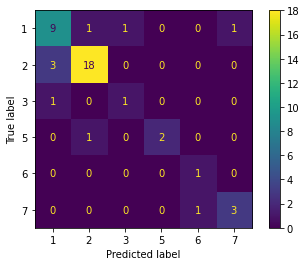

In [52]:
dt = tree.DecisionTreeClassifier()
Y_pred = dt.fit(X_train, Y_train).predict(X_test)
print(f"\nAccuracy score: {metrics.accuracy_score(Y_test, Y_pred):.3f}")
metrics.plot_confusion_matrix(dt, X_test, Y_test)


Accuracy score: 0.605


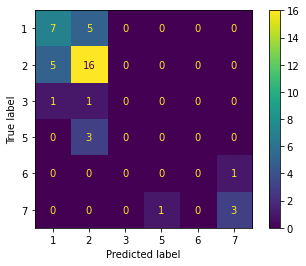

In [53]:
lr = LogisticRegression(max_iter=10000)
Y_pred = lr.fit(X_train, Y_train).predict(X_test)
print(f"\nAccuracy score: {metrics.accuracy_score(Y_test, Y_pred):.3f}")
metrics.plot_confusion_matrix(lr, X_test, Y_test)


Accuracy score: 0.279


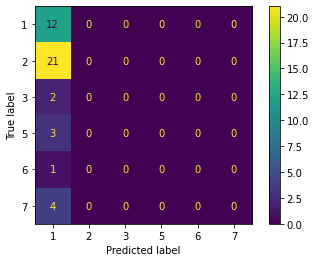

In [56]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(256,256))
Y_pred = mlp.fit(X_train, Y_train).predict(X_test)
print(f"\nAccuracy score: {metrics.accuracy_score(Y_test, Y_pred):.3f}")
metrics.plot_confusion_matrix(mlp, X_test, Y_test)

PARTD

What does the confusion matrix represent? Confusion matrices are a way to visualize the performance of an algorithm. The diagonal from [0,0] to [n, n] represent the correctly predicted values, and the other values outside of that represent the incorrectly predicted values.  

The best accuracy is the decision tree classifier and the worst accuracy is the MLPClassifier. 

# Question 4 - Churn Prediction (35pts)

Credit card churning is the practice of repeatedly opening and closing credit cards to earn cash, rewards points or miles. Often, you can qualify for a large intro bonus after opening a new credit card, which is something "churners'' exploit to try to amass a lot of rewards. However, credit card companies may view the practice as gaming the system and take steps to prevent it.

In this problem, you are provided with data from a bank. The objective is to process the data and build predictive models to classify if a customer is going to churn or not. You will be using sklearn [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and transformers in this exercise.


1.   
    a. What proportion of the users in the data churn? **(2pts)**
    
    b. Do credit card users churn more when compared to other users? (use a suitable plot) **(3pts)**
2. Set up the transformer for min-max normalization. Other required transformers are provided. **(5pts)** 
3. Scikit-learn provides the capability to create Machine Learning workflows by using a construct known as Pipeline. ML modeling pipelines can be viewed as directed acyclic graphs where each node is an "operator" performing some processing on the data frames or ndarrays. Use this [guide](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf) to understand how to create a pipeline and create a pipeline which has the following steps:<br>
    a. One hot encoding transformer on the categorical variables.<br>
    b. Min-max normalization transformer on the continuous variables.<br>
    c. Logistic Regression model.<br>
    Using the code for transformers given to you, fit this pipeline on the train set and report the F1 score and AUROC on the test set. **(10pts)**  
4. Add the following features to the data:<br>
    a. Ratio of balance to salary.<br>
    b. Ratio of tenure to age.<br>
    c. Ratio of credit score to age.<br>
   Using this new data, build a similar Logistic Regression pipeline as in the previous question and report the F1 score and AUROC on the test set. We see that the performance of the model improves with these additional features, hence we will be using the new dataset with these additional features from now (this question and all the questions ahead). 
   We have seen that the two classes are imbalanced in the data. We can improve the logistic regression model by changing the importance given to the classes - use the class_weight='balanced' option (by default, both classes have equal importance). Report the F1 score and AUROC on the test set. **(10 pts)**
5. Build a decision tree and Gaussian Naive Bayes pipelines. Plot an ROC for these two models, and the improved logistic regression model (in one plot). **(3 pts)**.
6. The calibration curve gives you a way of testing if your model is well-calibrated or not. Use sklearn's [calibration_curve](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html) function to plot the calibration curve for the Gaussian Naive Bayes model, and the improved logistic regression model and report which models are well-calibrated and which ones are not. **(2 pts)**

## Features:
1. CreditScore - Credit score of a user
1. Geography - Country/Region of the user
1. Gender - Gender of the user
1. Age - Age of the user
1. Tenure - Refers to the number of years that the customer has been a client of the bank
1. Balance - Current bank balance of the user
1. NumOfProducts - Number of products that the user has with the bank (e.g. debit card, mortgage loan, etc.)
1. HasCrCard - 0 if the user does not have a credit card, 1 otherwise
1. IsActiveMember - 0 if the user is not an active member, 1 otherwise
1. EstimatedSalary — Estimated salary of the user.
1. Exited — 0 if the user left the bank, 1 otherwise.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('q3.csv', delimiter=',')
df.shape
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#DONOT CHANGE THIS
df_train = df.sample(frac=0.8,random_state=11)
df_test = df.drop(df_train.index)

from sklearn.base import BaseEstimator, TransformerMixin
#We provide the required transformers to build the pipeline.
# Transfomer for performing one hot encoding on a specified categorical column
class OneHotEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self,col):
        self.col = col
                
    def transform(self, X):
        return pd.get_dummies(X[self.col]) 

    def fit(self, X, y=None):
        return self
    
# Stateless transformer for selecting a specified columns
class DFSubsetSelector(BaseEstimator,TransformerMixin):
    
    def __init__(self,cols):
        self.cols = cols
        
    def transform(self ,X):
        return X[self.cols]
    
    def fit(self, X, y=None):
        return self
    
class ConcatFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self,cols,sep="_"):
        self.cols = cols
        self.sep = sep
                
    def transform(self, X):
        concat_col = self.sep.join(self.cols)
        return X.apply(lambda x : self.sep.join([x[col] for col in self.cols]) ,axis=1).to_frame(name = concat_col)

    def fit(self, X, y=None):
        return self  

In [9]:
print("P(Churn):", (df[df.Exited > 0].shape[0])/(df.shape[0]))

P(Churn): 0.2037


P(Churn | Credit Card): 0.20184266477675408
P(Churn | No Credit Card): 0.20814940577249574
No, credit card users do not churn more than others according to the given data.


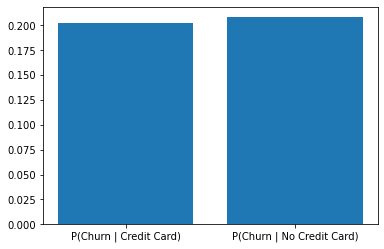

In [10]:
x = ["P(Churn | Credit Card)", "P(Churn | No Credit Card)"]
p = [0, 0]
#num credit card users
numCC = df[df.HasCrCard > 0].shape[0]
#proportion of credit card users that churn
temp = df.Exited & df.HasCrCard
p[0] = (temp[temp > 0].shape[0])/(numCC)
print("P(Churn | Credit Card):", (temp[temp > 0].shape[0])/(numCC))

#num non credit card users
numCC = df[df.HasCrCard == 0].shape[0]
#proportion of non credit card users that churn
temp = df.Exited & ~df.HasCrCard
p[1] = (temp[temp > 0].shape[0])/(numCC)
print("P(Churn | No Credit Card):", (temp[temp > 0].shape[0])/(numCC));

fig = plt.bar(x, p)
print("No, credit card users do not churn more than others according to the given data.")

In [11]:
class MinMaxNormalization(BaseEstimator, TransformerMixin):
    
    def __init__(self,col):
        self.col = col
                
    def transform(self, X):
        return (X[self.col]-X[self.col].min())/(X[self.col].max()-X[self.col].min())

    def fit(self, X, y=None):
        return self  

In [12]:
pl = Pipeline(steps=[ 
    ('one-hot', OneHotEncoder(col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])),
    ('min-max', MinMaxNormalization(col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])),
    ('log-reg', LogisticRegression())])

In [13]:
Y_train = df_train.iloc[:,10]
X_train = df_train.iloc[:,0:10]
Y_test = df_test.iloc[:,10]
X_test = df_test.iloc[:,0:10]
pl.fit(X_train, Y_train)
Y_pred = pl.predict(X_test)

In [14]:
print("Original")
print(f"\nF1 score: {metrics.f1_score(Y_test, Y_pred):.3f}")
print(f"\nAUROC: {metrics.roc_auc_score(Y_test, Y_pred):.3f}")

Original

F1 score: 0.108

AUROC: 0.518


In [15]:
#Ratio of balance to salary.
btoS = df['Balance']/df['EstimatedSalary']
#Ratio of tenure to age.
ttoA = df['Tenure']/df['Age']
#Ratio of credit score to age.
cstoA = df['CreditScore']/df['Age']

df.insert(0, 'bToS', btoS);
df.insert(0, 'tToA', ttoA);
df.insert(0, 'csToA', cstoA);
#df['bToS'] = btoS
#df['tToA'] = ttoA
#df['csToA'] = cstoA

In [16]:
pl = Pipeline(steps=[ 
    ('one-hot', OneHotEncoder(col = ['bToS', 'tToA', 'csToA', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])),
    ('min-max', MinMaxNormalization(col = ['bToS', 'tToA', 'csToA','CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])),
    ('log-reg', LogisticRegression())])

In [17]:
df_train = df.sample(frac=0.8,random_state=11)
df_test = df.drop(df_train.index)

In [18]:
Y_train = df_train.iloc[:,13]
X_train = df_train.iloc[:,0:13]
Y_test = df_test.iloc[:,13]
X_test = df_test.iloc[:,0:13]
pl.fit(X_train, Y_train)
Y_pred = pl.predict(X_test)

In [19]:
print("Three New Features")
print(f"\nF1 score: {metrics.f1_score(Y_test, Y_pred):.3f}")
print(f"\nAUROC: {metrics.roc_auc_score(Y_test, Y_pred):.3f}")

Three New Features

F1 score: 0.129

AUROC: 0.526


In [20]:
pl = Pipeline(steps=[ 
    ('one-hot', OneHotEncoder(col = ['bToS', 'tToA', 'csToA', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])),
    ('min-max', MinMaxNormalization(col = ['bToS', 'tToA', 'csToA','CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])),
    ('log-reg', LogisticRegression(class_weight='balanced'))])

In [21]:
pl.fit(X_train, Y_train)
Y_pred = pl.predict(X_test)

In [22]:
print("Class Weight Balanced")
print(f"\nF1 score: {metrics.f1_score(Y_test, Y_pred):.3f}")
print(f"\nAUROC: {metrics.roc_auc_score(Y_test, Y_pred):.3f}")

Class Weight Balanced

F1 score: 0.479

AUROC: 0.695


In [32]:
p2 = Pipeline(steps=[ 
    ('one-hot', OneHotEncoder(col = ['bToS', 'tToA', 'csToA', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])),
    ('min-max', MinMaxNormalization(col = ['bToS', 'tToA', 'csToA','CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])),
    ('dectree', DecisionTreeClassifier())])

p2.fit(X_train, Y_train)
Y_pred_dt = p2.predict(X_test)

p3 = Pipeline(steps=[ 
    ('one-hot', OneHotEncoder(col = ['bToS', 'tToA', 'csToA', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])),
    ('min-max', MinMaxNormalization(col = ['bToS', 'tToA', 'csToA','CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])),
    ('dectree', GaussianNB())])

p3.fit(X_train, Y_train)
Y_pred_gnb = p3.predict(X_test)

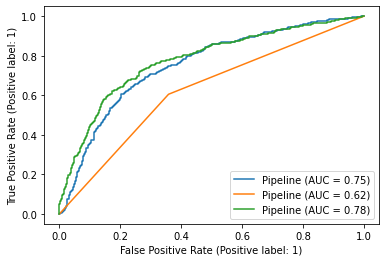

In [37]:
fig = metrics.plot_roc_curve( pl, X_test, Y_test)
fig = metrics.plot_roc_curve( p2, X_test, Y_test, ax = fig.ax_)
fig = metrics.plot_roc_curve( p3, X_test, Y_test, ax = fig.ax_)
plt.show() 

Text(0.5, 1.0, 'Naive Bayes Calibration Curve')

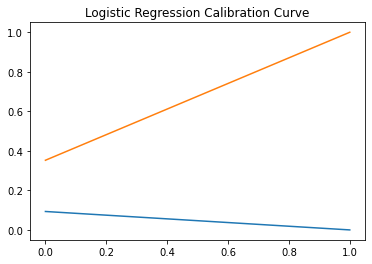

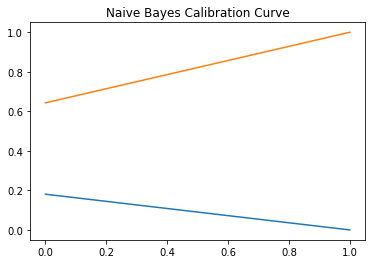

In [46]:
from sklearn.calibration import calibration_curve
plt.figure(0)
plt.plot(calibration_curve(Y_test, Y_pred))
plt.title("Logistic Regression Calibration Curve")
from sklearn.calibration import calibration_curve
plt.figure(1)
plt.plot(calibration_curve(Y_test, Y_pred_gnb))
plt.title("Naive Bayes Calibration Curve")

# Question 5 : Bayesian Belief Networks (15 pts)

![Question 1](https://i.imgur.com/3ayVbFi.jpeg) 

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(Bark = 1) = 0.05   
P(Rain = 1) = 0.01


P(Scared = 1 | Bark = 0, Rain = 0) = 0.001  
P(Scared = 1 | Bark = 0, Rain = 1) = 0.1  
P(Scared = 1 | Bark = 1, Rain = 0) = 0.8  
P(Scared = 1 | Bark = 1, Rain = 1) = 0.9  

P(Hides = 1 | Scared = 1) = 0.95  
P(Hides = 1 | Scared = 0) = 0.05  

For the given Bayesian network, Compute the following probabilities :  


**(a) (4 pts)** Find the probability that cat hides = 1.  
**(b) (4 pts)** Given that cat got scared (Scared = 1), what is the probability that it rained (Rain = 1)?  
**(c) (7 pts)** Given that cat got scared (Scared = 1) and the dog barked (Bark = 1), what is the probability that it rained (Rain = 1)?

PART A
Want to find
P(Hides) = P(Scared)P(Hides|Scared) + P(Not Scared)P(Hides|Not Scared)

We first need: P(Scared)

P(Scared) = P(Scared|Bark,Rain)P(Bark)P(Rain) + P(Scared|Bark, No Rain)P(Bark)P(No Rain) + P(Scared|No Bark,Rain)P(No Bark)P(Rain) + P(Scared|No Bark, No Rain)P(No Bark)P(No Rain) 

P(No Bark) = 1 - P(Bark)
P(No Rain) = 1 - P(Rain)
P(Not Scared) = 1-P(Scared);

PART B
Want to Find
P(Rain | Scared) = P(Scared | Rain) * P(Rain) / P(Scared)

We first need: P(Scared | Rain)
P(Scared | Rain) = P(Bark) P(Scared | Bark, Rain) + P (No Bark) P(Scared | No Bark, Rain)


PART C
P(A | B, C) = P(B | A, C) P(A | C) / P(B | C)
A = rain
B = scared
C = bark

Want to find:
P(Rain|Scared, Bark) = P(Rain, Scared, Bark) / P(Scared, Bark)

First we need: P(Scared, Bark)
P(Scared | Bark) = P(Scared, Bark) / P(Bark)

To get that, we need: P(Scared | Bark)
P(Scared | Bark) = P(Rain) P(Scared | Bark, Rain) + P (No Rain) P(Scared | No Bark, Rain)

P(Rain | 

# Question 6 - Comparison of different ensembles method for classification (20 pts)

We will use the dataset from the kaggle competition [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit). We will work on a smaller version of this dataset. The dataset is available on canvas as ensemble-dataset.csv. 
We will predict the probability that somebody will experience financial distress in the next two years. The dataset has already been split into train and test sets for you.

In [ ]:
data = pd.read_csv('ensemble-dataset.csv')
data.head()

In [ ]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

In this question, we will compare performance of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) Classifiers.

Part a) **2.5pts** Use a Decision Tree Classifier with random_state = 10 for the classification problem. Report the accuracy_score and roc_auc_score on the test data for the classifier.

Part b) **2.5pts** Create an ensemble of 20 classifiers (i.e n_estimators = 20) with random_state = 10 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier from part a). Report accuracy_score and roc_auc_score on the test data for the Bagging classifiers. 

Part c) **5pts** Use the training data and build a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model for the classification problem. Find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch. Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data using the model fit with best parameters. (5pts)

Part d) **5pts** Use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data. 

Part e) **5pts** Compare the performance of decision tree from part a) with the ensemble methods, Briefly explain which of the three ensemble method performed better and why?